# Equipotential Lines
The functions defined below implement the calculation and plotting of both equipotential lines (via a contour plot) and electric field lines (via a stream plot).  

## The Physics

## Electric Field

$$\vec{E}(\vec{r})=k\sum \frac{q_i}{|\vec{r}|^2}\hat{r}$$

## Electric Potential

$$V(\vec{r})=k \sum \frac{q_i}{|\vec{r}|}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#DO NOT ERASE THESE!!!!
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="xx-large")
plt.rc("axes", titlesize="xx-large")
plt.rc("figure", figsize=(10,8))

## Part 1: Defining the Python Functions
The *V* function for potential and the *Efield* function for electric field take as argument the $x$ and $y$ coordinates of the test/evaluation point, and then the list of electric charges.  

The list of electric charges, *qr*, is set up so that each charge *q* in *qr* is a three-element tuple (a tuple is a finite ordered list (sequence) of elements).  For each *q* in *qr*:

  * q[0] is the charge's $x$ coordinate.
  * q[1] is the charge's $y$ coordinate.
  * q[2] is the electric charge. 
  
The Coulomb constant $k$ is scaled in a way that assumes the charges will be given in units of nC.  

The next function defines the plotting function.  It takes as argument the list of point charges *qr* and a string for the title of the plot. It plots 

  * A contour plot for the electric potential.
  * An extra thick contour line at V=0, for highlighting purposes. 
  * A stream plot for the electric field. 
  
## Update the functions where required (marked with ??)

In [ ]:
k = (9E9) * (1E-9)    # Will yield E in units of Volts/meter, and V in Volts.
radius = 0.02         # "dead zone" to prevent calculating E or V on top of a charge

#set up our coordinate system
x = np.arange(-10.0,10.0,0.1)
y = np.arange(-10.0,10.0,0.1)
X,Y = np.meshgrid(x,y)

def V(q,xField,yField):
    Vr = 0.0
    # Calculate the distance between the charge and the field point.
    rx = q[0] - xField
    ry = q[1] - yField
    r = np.array([rx, ry])
    rmag = np.linalg.norm(r)
    
    if (rmag >= radius):
        Vr += q[2] / rmag #equation for potential 
        return Vr
    else:
        return 0

def PointEField(q,xField,yField):
    Ex = np.array([0.0])
    Ey = np.array([0.0])
    # Calculate the distance between the charge and the field point.
    rx = xField - q[0]
    ry = yField - q[1]
    r = np.array([rx, ry])
    rmag = np.linalg.norm(r)
    
    if rmag<=radius:
        return 0,0
    else:
        # Calculate the electric field's magnitude.
        Emag = q[2] / rmag ** 2 * (r / rmag)

        # Calculate the x- and y-components of the field.
        Ex = Emag[0]
        Ey = Emag[1]

        # Return the two components as the function's outputs.
        return Ex,Ey

def Plots(qr,title = ""):
    #sets up the coordinate grid to eventually fill with values
    Ex = np.zeros(X.shape)
    Ey = np.zeros(X.shape)
    V_values = np.zeros(X.shape)
    u = np.zeros(X.shape)
    v = np.zeros(X.shape)
    w = np.zeros(X.shape)

    #Runs through all charges and sets the values at each location i,j on our coordiante grid
    for q in qr:
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Ex[i,j] = Ex[i,j] + PointEField(q,X[i,j],Y[i,j])[0]
                Ey[i,j] = Ey[i,j] + PointEField(q,X[i,j],Y[i,j])[1]
                V_values[i,j] = V_values[i,j] + V(q,X[i,j],Y[i,j])
                
                #values for our plots
                u = Ex
                v = Ey
                w = V_values    
    
    #plotting
    equipot = plt.contour(X,Y,w,levels=np.linspace(0.5*np.min(w), 0.5*np.max(w), 20))
    plt.contour(X,Y,w, levels=[0.0], linewidths=4.0)
    plt.streamplot(X,Y,u,v, color="black",density=2)
    plt.colorbar(equipot)
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title)
    plt.show()

## Part 2: Single Charges
In this example, we

  1. Set up the list of charges *qr*.
  2. Call the plotting function, which will plot *both* the electric field lines and the equipotential lines.

In [ ]:
qr = []
qr.append((0.0, 0.0, -1.0))
Plots(qr, title = "Electric Field and Equipotential lines of a single point charge")

### Questions to answer 

**Look at your electric field due to the point charge. What are the major features you see? Do they align with your expectations from what you already know about electric field lines?**

Answer: I see equally-spaced lines coming out from the center of the plot. This make sense, because the single point charge generates electric forces surrounding it in a circle, and those forces point away from the charge because the charge is positive. 

**Since the contour lines represent lines of equal electric potential, they are known as equipotential lines. What are the major features you see of these lines?**

Answer: They make circles around the charge. 

**Repeat this process for a negative point charge - compare and contrast your plots (refer to both electric field and electric potential)** 

Answer: The electric field lines are different in that they now point inwards towards the charge, but they are still equally spaced, and the equipotential lines still make rings around the charge.

**What relationship do you see between the electric field lines and the equipotential lines?**

Answer:

## Part 3: A positive and negative charge

Now, adapt the above methods to produce plots that contain both the electric field and equipotential lines for each of the following collections of point charges. Note: In your plots, it will turn out to be helpful to highlight the V=0
 equipotentials, for example by plotting that line extra thickly.

1. A positive charge of 1 nC at (x,y)=(1.0,0.0), and an equal but opposite charge at (x,y)=(−1.0,0.0)

2. A positive charge at 1nC at (x,y)=(1.0,0.0), and another positive charge of equal magnitude at (x,y)=(−1.0,0.0)

3. A positive charge of 1 nC at (x,y)=(4.0,0.0), and a negative charge of half the magnitude at (x,y)=(1.0,0.0)

Describe the shapes of the electric field lines and the equipotential lines for each case. Compare and contrast the features of these plots with the single-particle cases above.


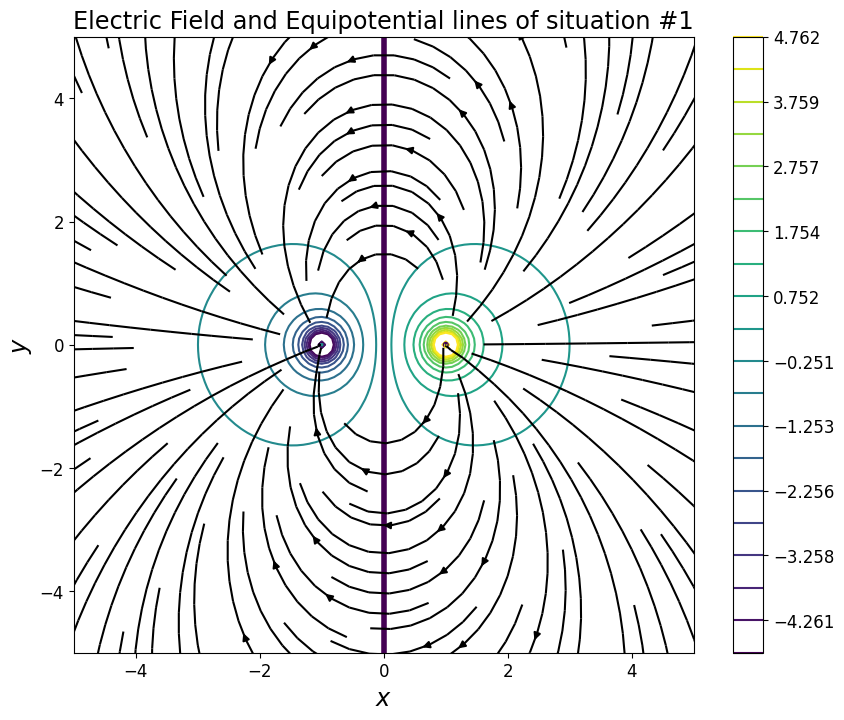

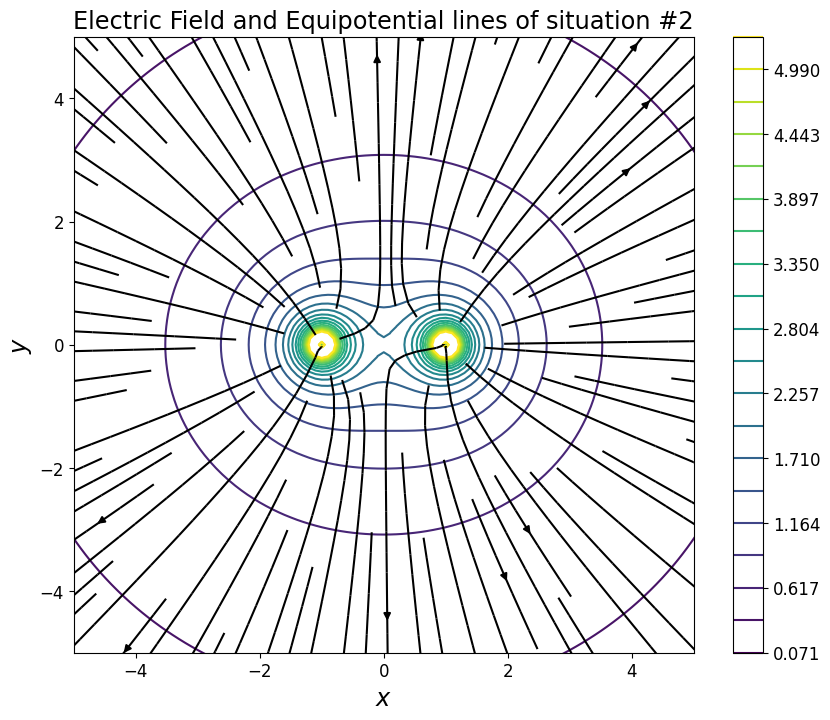

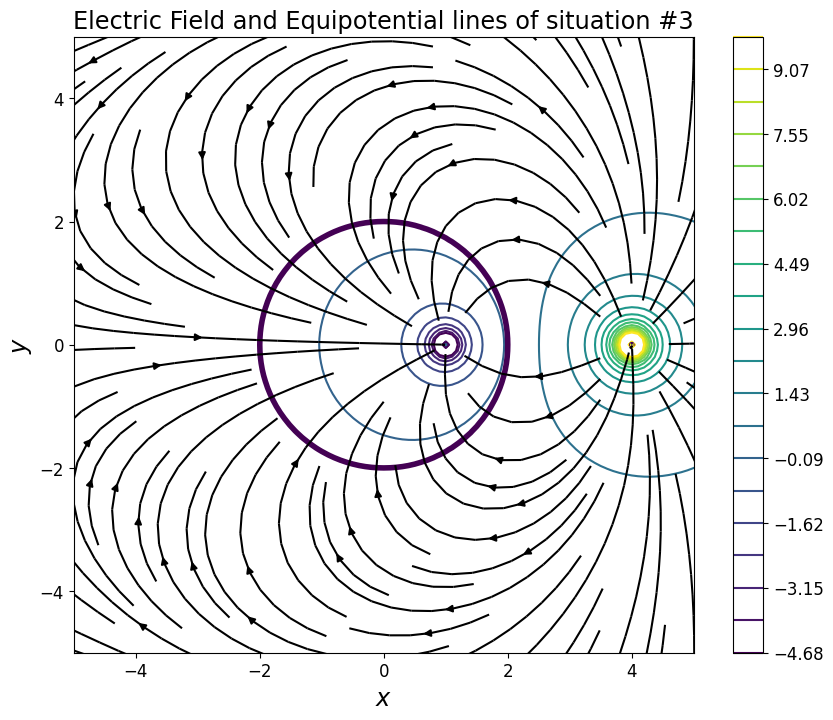

In [25]:
qr = []
qr.append((1.0, 0.0, 1.0))
qr.append((-1.0, 0.0, -1.0))
Plots(qr, title = "Electric Field and Equipotential lines of situation #1")

qr = []
qr.append((1.0, 0.0, 1.0))
qr.append((-1.0, 0.0, 1.0))
Plots(qr, title = "Electric Field and Equipotential lines of situation #2")

qr = []
qr.append((4.0, 0.0, 2.0))
qr.append((1.0, 0.0, -1.0))
Plots(qr, title = "Electric Field and Equipotential lines of situation #3")

The first situation represents an electric dipole, or one positive charge and one negative charge. The field lines flow from the positive charge to the negative charge, creating curves up and down around the center between the charges. The equipotential lines create circular shapes around the charges, althoruhg unlike the single charge graph, they become more distorted as they get farther away from the charges. There is also an equipotential line that splits the graph in half vertically. 

The second situation has two positive charges, and the electric field points directly away from the charges, creating asymptotes in the space between the charges. The equipoential lines form ellipse-like shapes around the two charges. Unlike the first situation, these lines get more circular as they get farther away. 

The third situation is very similar to the first, except the positive charge is stronger, so the field lines look shifted and distorted compared to the first graph. The equipotential lines are also similar, except that the lines around the positive charge become distored more quickly. 

## Part 4: Four Point Charges (quadrupole)

Now, adapt the above methods to produce plots that contain both the electric field and equipotential lines for each of the following collections of point charges.

1. A set of four point charges: +1nC at (+1.0,+1.0), −1nC at (−1.0,+1.0), +1nC at (−1.0,−1.0), and −1nC at (+1.0,−1.0)

2. Keep the same list as above but off set one charge by 0.5

Describe the shapes of the electric field lines and the equipotential lines for each case. Compare and contrast the features of these plots with the two-particle cases above.

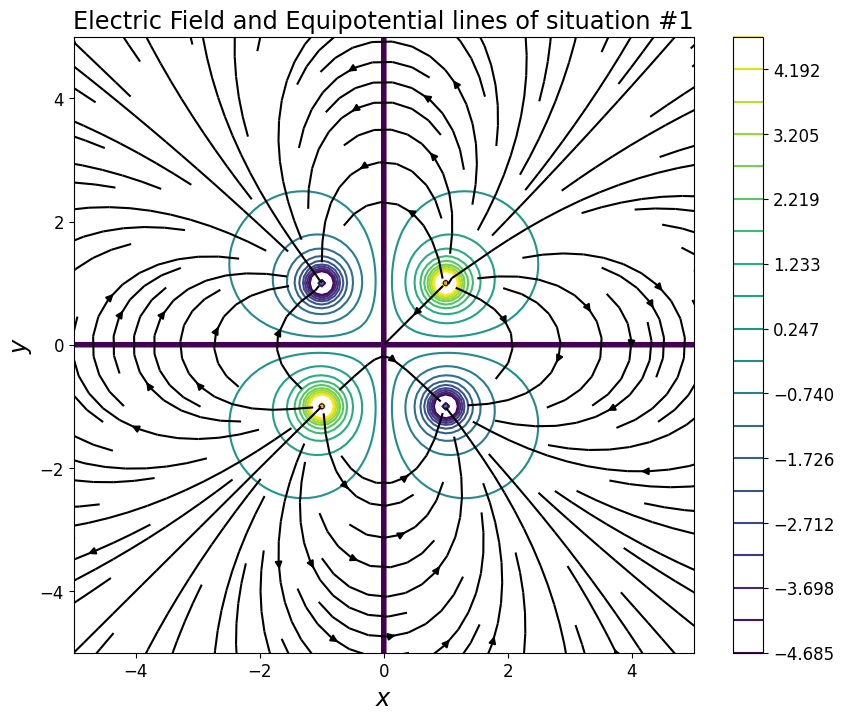

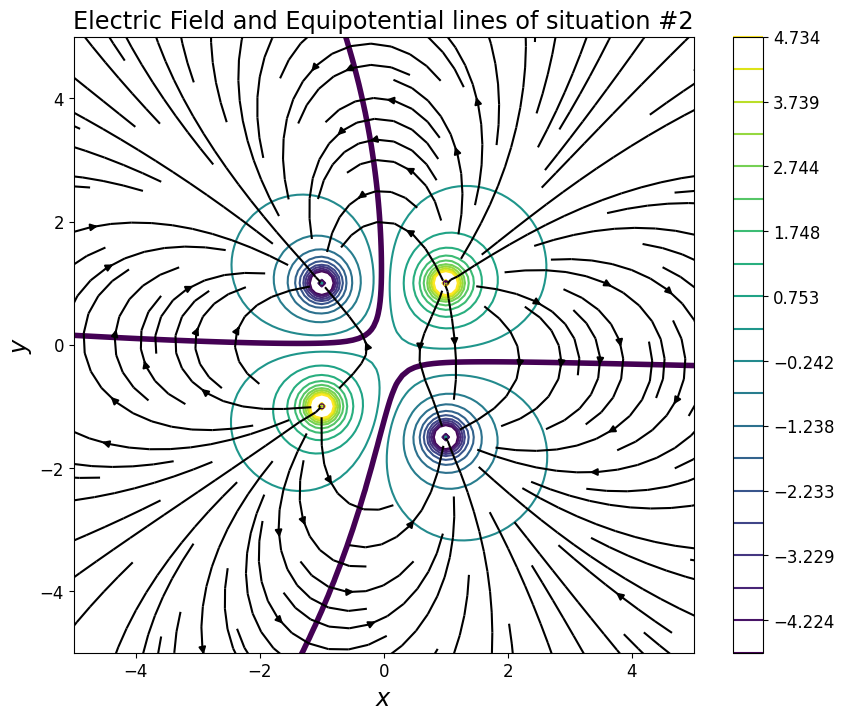

In [24]:
qr = []
qr.append((1.0, 1.0, 1.0))
qr.append((-1.0, 1.0, -1.0))
qr.append((-1.0, -1.0, 1.0))
qr.append((1.0, -1.0, -1.0))
Plots(qr, title = "Electric Field and Equipotential lines of situation #1")

qr = []
qr.append((1.0, 1.0, 1.0))
qr.append((-1.0, 1.0, -1.0))
qr.append((-1.0, -1.0, 1.0))
qr.append((1.0, -1.0 - 0.5, -1.0))
Plots(qr, title = "Electric Field and Equipotential lines of situation #2")

In the first situation, the field lines look very similar to electric dipoles, except that there are 4 total pairs of positive and negative electrons, so there are four copies of those field lines. The equipotential lines start out as circles around the charges, before distorting into clover-leaf shapes. Similar to the electric dipole, there are straight equipotential lines dividing the graph, excepr they divide it into quadrants instead of in half. 

The second situation is very similar to the first, except for distorion caused by the shifted charge. The field lines look very similar, except are angled around the shifted charge. The equipotential lines look similar, except near the shifted charge where they create an obtuse angle at the origin. 